#Bussiness Understanding

Kali ini akan menganalisis sentimen untuk data teks dari twitter dan data dari portal berita kompas.com. Topik yang diambil kali ini adalah ktt g20

#Data Understanding

In [1]:
pip install tweepy==4.10.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import tweepy
import requests
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.probability import FreqDist
import seaborn as sns
from bs4 import BeautifulSoup

##Twitter

In [4]:
with open("token_mytwit2.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

In [5]:
import tweepy

api = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)

In [6]:
query = "ktt g20 -is:retweet lang:id"

response = tweepy.Paginator(api.search_recent_tweets,
                          query = query,
                          max_results=100
                          ).flatten(limit=1001)

In [7]:
tweets = [tweet.text.strip() for tweet in response]
df_tweets = pd.DataFrame(tweets, columns=["tweets"])
# st.dataframe(df_tweets, use_container_width=True)

In [8]:
df_tweets

,tweets
0,Jelang KTT G20 Jokowi Hebat.\n#KTTG20\n#Presid...
1,@RasizSubekti @kun_gustavo Pengawalan delegasi...
2,@waktu_ghibah KTT G20 Indonesia keren.. \n#KTT...
3,Pemerintah pastikan pasokan listrik aman selam...
4,KTT G20 Diharapkan Capai Hasil Terbaik di Teng...
...,...
995,KAKANWIL A YUSPAHRUDDIN KEMENKUMHAM JATENG: Se...
996,KAKANWIL A YUSPAHRUDDIN KEMENKUMHAM JATENG: Se...
997,Haiii #MitraDarat!\n\nMasih bahas seputar acar...
998,KAKANWIL A YUSPAHRUDDIN KEMENKUMHAM JATENG: Se...


In [9]:
st.dataframe(df_tweets, use_container_width=True)

  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2022-11-13 00:57:34.745 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [10]:
from pandas.core.reshape.merge import string
def case_folding(data):
    data = data.lower()
    data = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",data).split())
    data = re.sub(r"\d+", "", data)
    data = data.translate(str.maketrans("","",string.punctuation))
    data = re.sub(r"\n","",data)
    data = re.sub(r"\t","",data)
    return data
df_tweets['tweet_clean'] = df_tweets['tweets'].apply(case_folding)
df_tweets

,tweets,tweet_clean
0,Jelang KTT G20 Jokowi Hebat.\n#KTTG20\n#Presid...,jelang ktt g jokowi hebat kttg presidensig gin...
1,@RasizSubekti @kun_gustavo Pengawalan delegasi...,gustavo pengawalan delegasi ktt g dioptimalkan...
2,@waktu_ghibah KTT G20 Indonesia keren.. \n#KTT...,ghibah ktt g indonesia keren kttg presidensig ...
3,Pemerintah pastikan pasokan listrik aman selam...,pemerintah pastikan pasokan listrik aman selam...
4,KTT G20 Diharapkan Capai Hasil Terbaik di Teng...,ktt g diharapkan capai hasil terbaik di tengah...
...,...,...
995,KAKANWIL A YUSPAHRUDDIN KEMENKUMHAM JATENG: Se...,kakanwil a yuspahruddin kemenkumham jateng sem...
996,KAKANWIL A YUSPAHRUDDIN KEMENKUMHAM JATENG: Se...,kakanwil a yuspahruddin kemenkumham jateng sem...
997,Haiii #MitraDarat!\n\nMasih bahas seputar acar...,haiii mitradarat masih bahas seputar acara pun...
998,KAKANWIL A YUSPAHRUDDIN KEMENKUMHAM JATENG: Se...,kakanwil a yuspahruddin kemenkumham jateng sem...


In [11]:
st.dataframe(df_tweets, use_container_width=True)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('indonesian')

def clean_stopwords(text):
  word_list = text.split()
  text = ' '.join(i for i in word_list if i not in stop_words)
  return text

df_tweets['tweet_clean'] = df_tweets['tweet_clean'].apply(clean_stopwords)
df_tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweets,tweet_clean
0,Jelang KTT G20 Jokowi Hebat.\n#KTTG20\n#Presid...,jelang ktt g jokowi hebat kttg presidensig gin...
1,@RasizSubekti @kun_gustavo Pengawalan delegasi...,gustavo pengawalan delegasi ktt g dioptimalkan...
2,@waktu_ghibah KTT G20 Indonesia keren.. \n#KTT...,ghibah ktt g indonesia keren kttg presidensig ...
3,Pemerintah pastikan pasokan listrik aman selam...,pemerintah pastikan pasokan listrik aman ktt g...
4,KTT G20 Diharapkan Capai Hasil Terbaik di Teng...,ktt g diharapkan capai hasil terbaik keteganga...
...,...,...
995,KAKANWIL A YUSPAHRUDDIN KEMENKUMHAM JATENG: Se...,kakanwil a yuspahruddin kemenkumham jateng sem...
996,KAKANWIL A YUSPAHRUDDIN KEMENKUMHAM JATENG: Se...,kakanwil a yuspahruddin kemenkumham jateng sem...
997,Haiii #MitraDarat!\n\nMasih bahas seputar acar...,haiii mitradarat bahas seputar acara puncak kt...
998,KAKANWIL A YUSPAHRUDDIN KEMENKUMHAM JATENG: Se...,kakanwil a yuspahruddin kemenkumham jateng sem...


In [13]:
st.dataframe(df_tweets, use_container_width=True)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [14]:
pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
nltk.download('punkt')
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(stemmer.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

df_tweets['tweet_clean'] = df_tweets['tweet_clean'].apply(stemSentence)
df_tweets

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweets,tweet_clean
0,Jelang KTT G20 Jokowi Hebat.\n#KTTG20\n#Presid...,jelang ktt g jokowi hebat kttg presidensig gin...
1,@RasizSubekti @kun_gustavo Pengawalan delegasi...,gustavo awal delegasi ktt g optimal tunjuk bai...
2,@waktu_ghibah KTT G20 Indonesia keren.. \n#KTT...,ghibah ktt g indonesia keren kttg presidensig ...
3,Pemerintah pastikan pasokan listrik aman selam...,perintah pasti pasok listrik aman ktt g kttg p...
4,KTT G20 Diharapkan Capai Hasil Terbaik di Teng...,ktt g harap capai hasil baik tegang geopolitik...
...,...,...
995,KAKANWIL A YUSPAHRUDDIN KEMENKUMHAM JATENG: Se...,kakanwil a yuspahruddin kemenkumham jateng sem...
996,KAKANWIL A YUSPAHRUDDIN KEMENKUMHAM JATENG: Se...,kakanwil a yuspahruddin kemenkumham jateng sem...
997,Haiii #MitraDarat!\n\nMasih bahas seputar acar...,haiii mitradarat bahas putar acara puncak ktt ...
998,KAKANWIL A YUSPAHRUDDIN KEMENKUMHAM JATENG: Se...,kakanwil a yuspahruddin kemenkumham jateng sem...


In [16]:
st.dataframe(df_tweets, use_container_width=True)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [17]:
with open("./kata_positif.txt","r") as positif_file :
  positive_words = list(set(positif_file.readlines()))
with open("./kata_negatif.txt","r") as negative_file :
  negative_words = list(set(negative_file.readlines()))

In [18]:
hasil = []
list_negasi = ['tidak','lawan','anti', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'tak']

for tweet in tweets:

    tweet_clean = tweet.strip().split()
    
    good_count = 0 #nilai positif
    bad_count = 0 #nilai negatif

    for good_word in positive_words:
        count = tweet_clean.count(good_word.strip().lower())
        if count > 0:
          print(good_word.strip())
          good_count += count

    for bad_word in negative_words:
        count = tweet_clean.count(bad_word.strip().lower())
        if count > 0:
          print(bad_word.strip())
          bad_count += count
    
    print ("positif: "+str(good_count))
    print ("negatif: "+str(bad_count))
    hasil.append(good_count - bad_count)
    print ("-----------------------------------------------------")

positif: 0
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
aman
positif: 1
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
sukses
mantap
positif: 2
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
isu
positif: 0
negatif: 1
-----------------------------------------------------
maju
positif: 1
negatif: 0
-----------------------------------------------------
positif
positif: 1
negatif: 0
-----------------------------------------------------
inisiatif
positif
positif: 2
negatif: 0
------------

In [19]:
sentiments = ["positif" if sentimen > 0 else ("netral" if sentimen == 0 else "negatif") for sentimen in hasil]
df_tweets["sentiment"] = sentiments
df_tweets

,tweets,tweet_clean,sentiment
0,Jelang KTT G20 Jokowi Hebat.\n#KTTG20\n#Presid...,jelang ktt g jokowi hebat kttg presidensig gin...,netral
1,@RasizSubekti @kun_gustavo Pengawalan delegasi...,gustavo awal delegasi ktt g optimal tunjuk bai...,netral
2,@waktu_ghibah KTT G20 Indonesia keren.. \n#KTT...,ghibah ktt g indonesia keren kttg presidensig ...,netral
3,Pemerintah pastikan pasokan listrik aman selam...,perintah pasti pasok listrik aman ktt g kttg p...,positif
4,KTT G20 Diharapkan Capai Hasil Terbaik di Teng...,ktt g harap capai hasil baik tegang geopolitik...,netral
...,...,...,...
995,KAKANWIL A YUSPAHRUDDIN KEMENKUMHAM JATENG: Se...,kakanwil a yuspahruddin kemenkumham jateng sem...,netral
996,KAKANWIL A YUSPAHRUDDIN KEMENKUMHAM JATENG: Se...,kakanwil a yuspahruddin kemenkumham jateng sem...,netral
997,Haiii #MitraDarat!\n\nMasih bahas seputar acar...,haiii mitradarat bahas putar acara puncak ktt ...,positif
998,KAKANWIL A YUSPAHRUDDIN KEMENKUMHAM JATENG: Se...,kakanwil a yuspahruddin kemenkumham jateng sem...,netral


In [20]:
st.dataframe(df_tweets, use_container_width=True)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [21]:
print (f'''
Mean: {np.mean(hasil)}
Median: {np.median(hasil)}
quartil awal: {np.quantile(hasil,0.25)}
quartil akhir: {np.quantile(hasil,0.75)}
Standar deviasi: {np.std(hasil)}     
''')


Mean: 0.361
Median: 0.0
quartil awal: 0.0
quartil akhir: 0.0
Standar deviasi: 0.8489281477251182     



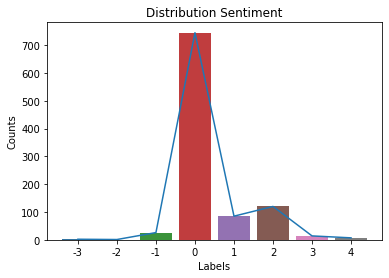

In [64]:
labels, counts = np.unique(hasil, return_counts=True)

fig, ax = plt.subplots()
ax.set_xticks(ax.get_xticks())
ax.figure.savefig('file.png')
sns.barplot(x = list(labels), 
            y = list(counts))

sns.lineplot(x = ax.get_xticks(), 
            y = list(counts))

plt.title(f'Distribution Sentiment')
plt.xlabel('Labels')
plt.ylabel('Counts')

plt.show()

In [65]:
st.pyplot(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


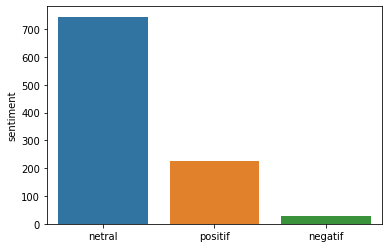

In [68]:
sns.barplot(df_tweets['sentiment'].value_counts().index,df_tweets['sentiment'].value_counts())
ax.figure.savefig('file2.png')
plt.show()

In [69]:
st.pyplot(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

##Website

In [30]:
kompas = requests.get('https://www.kompas.com/')
kompas.content

b'<!DOCTYPE html> \n<html>\n<head>\n    \n   \n<!-- Google Tag Manager -->\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n})(window,document,\'script\',\'dataLayer\',\'GTM-PT7PC4\');</script>\n<!-- End Google Tag Manager -->\n<title>Berita Terkini Hari Ini, Kabar Akurat Terpercaya - Kompas.com</title>\n<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch">\n<link href="//asset.kompas.com" rel="dns-prefetch">\n<link href="//adsimg.kompas.com" rel="dns-prefetch">\n<link href="//static.criteo.net" rel="dns-prefetch">\n<link href="//bidder.criteo.com" rel="dns-prefetch">\n<link href="//rtax.criteo.com" rel="dns-prefetch">\n<link href="//tpc.googlesyndication.com" rel="dns-prefetch">\n<link href="//cm.g.doubleclick.net" 

In [31]:
beautify = BeautifulSoup(kompas.content)
beautify

<!DOCTYPE html>
<html>
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-PT7PC4');</script>
<!-- End Google Tag Manager -->
<title>Berita Terkini Hari Ini, Kabar Akurat Terpercaya - Kompas.com</title>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//asset.kompas.com" rel="dns-prefetch"/>
<link href="//adsimg.kompas.com" rel="dns-prefetch"/>
<link href="//static.criteo.net" rel="dns-prefetch"/>
<link href="//bidder.criteo.com" rel="dns-prefetch"/>
<link href="//rtax.criteo.com" rel="dns-prefetch"/>
<link href="//tpc.googlesyndication.com" rel="dns-prefetch"/>
<link href="//cm.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//s0.2mdn.

In [54]:
populer = beautify.find('div',{'class','most__wrap clearfix'})
populer

<div class="most__wrap clearfix">
<div class="most__list clearfix">
<div class="most__count">1</div>
<a class="most__link" href="https://megapolitan.kompas.com/read/2022/11/12/20424741/3-anggota-ormas-minta-rp-22-juta-ke-pekerja-proyek-jembatan-dadap">
<h4 class="most__title">3 Anggota Ormas Minta Rp 22 Juta ke Pekerja Proyek Jembatan Dadap, Alasannya untuk Keamanan</h4>
<div class="most__read">Dibaca 15.470 kali</div>
</a>
</div><div class="most__list clearfix">
<div class="most__count">2</div>
<a class="most__link" href="https://regional.kompas.com/read/2022/11/12/225918378/tubuh-tertancap-anak-panah-2-anggota-polisi-tetap-halau-warga-yang-bentrok">
<h4 class="most__title">Tubuh Tertancap Anak Panah, 2 Anggota Polisi Tetap Halau Warga yang Bentrok di Maluku Tenggara</h4>
<div class="most__read">Dibaca 7.036 kali</div>
</a>
</div><div class="most__list clearfix">
<div class="most__count">3</div>
<a class="most__link" href="https://www.kompas.com/sports/read/2022/11/13/00150848/tiba-ti

In [55]:
berita = populer.find_all('div',{'class','most__list clearfix'})
berita

[<div class="most__list clearfix">
 <div class="most__count">1</div>
 <a class="most__link" href="https://megapolitan.kompas.com/read/2022/11/12/20424741/3-anggota-ormas-minta-rp-22-juta-ke-pekerja-proyek-jembatan-dadap">
 <h4 class="most__title">3 Anggota Ormas Minta Rp 22 Juta ke Pekerja Proyek Jembatan Dadap, Alasannya untuk Keamanan</h4>
 <div class="most__read">Dibaca 15.470 kali</div>
 </a>
 </div>, <div class="most__list clearfix">
 <div class="most__count">2</div>
 <a class="most__link" href="https://regional.kompas.com/read/2022/11/12/225918378/tubuh-tertancap-anak-panah-2-anggota-polisi-tetap-halau-warga-yang-bentrok">
 <h4 class="most__title">Tubuh Tertancap Anak Panah, 2 Anggota Polisi Tetap Halau Warga yang Bentrok di Maluku Tenggara</h4>
 <div class="most__read">Dibaca 7.036 kali</div>
 </a>
 </div>, <div class="most__list clearfix">
 <div class="most__count">3</div>
 <a class="most__link" href="https://www.kompas.com/sports/read/2022/11/13/00150848/tiba-tiba-tenis-sang-l

In [57]:
for each in berita:
  nomor = each.find('div',{'class','most__count'}).text
  judul = each.find('h4',{'class','most__title'}).text
  link = each.a.get('href')
  print(nomor)
  print(judul)
  print(link)
  print('')

1
3 Anggota Ormas Minta Rp 22 Juta ke Pekerja Proyek Jembatan Dadap, Alasannya untuk Keamanan
https://megapolitan.kompas.com/read/2022/11/12/20424741/3-anggota-ormas-minta-rp-22-juta-ke-pekerja-proyek-jembatan-dadap

2
Tubuh Tertancap Anak Panah, 2 Anggota Polisi Tetap Halau Warga yang Bentrok di Maluku Tenggara
https://regional.kompas.com/read/2022/11/12/225918378/tubuh-tertancap-anak-panah-2-anggota-polisi-tetap-halau-warga-yang-bentrok

3
Tiba Tiba Tenis: Sang Legenda Kehabisan Kata-kata, Tenis Indonesia Pemenangnya! 
https://www.kompas.com/sports/read/2022/11/13/00150848/tiba-tiba-tenis-sang-legenda-kehabisan-kata-kata-tenis-indonesia

4
Elon Musk Batal Hadir di B20 Summit Bali
https://money.kompas.com/read/2022/11/13/070740326/elon-musk-batal-hadir-di-b20-summit-bali

5
Kaesang Prewedding di Stadion Manahan, Gibran Tagih Uang Sewa: Emang Kaesang Istimewa?
https://regional.kompas.com/read/2022/11/13/052409978/kaesang-prewedding-di-stadion-manahan-gibran-tagih-uang-sewa-emang-kaesan

In [74]:
berita_populer=[]

for i in range(1, 10):
    URL = "https://www.kompas.com/"
    kompas = requests.get(URL)
    
    soup = BeautifulSoup(kompas.content, 'html5lib') # If this line causes an error, run 'pip install html5lib' or install html5lib
   
    populer = soup.find('div',{'class','most__wrap clearfix'})
    berita = populer.find_all('div',{'class','most__list clearfix'})
    
    for each in berita:
        list_berita = {}
        list_berita['nomor'] = each.find('div',{'class','most__count'}).text
        list_berita['judul berita populer'] = each.find('h4',{'class','most__title'}).text
        list_berita['link'] = each.a.get('href')
        berita_populer.append(list_berita)


In [75]:
pd.DataFrame(berita_populer)

,nomor,judul berita populer,link
0,1,"Kaesang Prewedding di Stadion Manahan, Gibran ...",https://regional.kompas.com/read/2022/11/13/05...
1,2,Tetangga Sebelah Rumah Satu Keluarga Tewas di ...,https://megapolitan.kompas.com/read/2022/11/13...
2,3,Pembunuh Mahasiswa Unpad Marah Fotonya Akan Di...,https://bandung.kompas.com/read/2022/11/13/081...
3,4,Tiba Tiba Tenis: Sang Legenda Kehabisan Kata-k...,https://www.kompas.com/sports/read/2022/11/13/...
4,5,Elon Musk Batal Hadir di B20 Summit Bali,https://money.kompas.com/read/2022/11/13/07074...
...,...,...,...
85,6,"Terakhir Terlihat 2-3 Bulan Lalu, Tetangga Seb...",https://megapolitan.kompas.com/read/2022/11/13...
86,7,"Misteri Satu Keluarga Tewas di Kalideres, Kega...",https://megapolitan.kompas.com/read/2022/11/13...
87,8,"Surya Paloh di Persimpangan Jalan, ""Sayonara J...",https://nasional.kompas.com/read/2022/11/13/08...
88,9,Daftar Wakil Indonesia di Australia Open 2022:...,https://www.kompas.com/badminton/read/2022/11/...


In [ ]:
st.dataframe(berita_populer)

In [ ]:
# import requests
# from bs4 import BeautifulSoup

# page = 1

# berita=[]  # a list to store quotes

# for i in range(1, 10):
#     URL = "https://search.kompas.com/search/?q=ktt+g20&submit=Kirim#gsc.tab=0&gsc.q=ktt%20g20&gsc.page={}".format(page)
#     r = requests.get(URL)
    
#     soup = BeautifulSoup(r.content, 'html5lib') # If this line causes an error, run 'pip install html5lib' or install html5lib
   
#     table = soup.find('div', attrs = {'id': 'ktt g20'})
    
#     for row in table.findAll('div',
#                             attrs = {'class':'col-6 col-lg-4 text-center margin-30px-bottom sm-margin-30px-top'}):
#         quote = {}
#         quote['theme'] = row.h5.text
#         quote['url'] = row.a['href']
#         quote['img'] = row.img['src']
#         quote['lines'] = row.img['alt'].split(" #")[0]
#         quote['author'] = row.img['alt'].split(" #")[1]
#         berita.append(quote)

#     page = page + 1

In [58]:
# kompas_berita = requests.get('https://search.kompas.com/search/?q=ktt+g20&submit=Kirim#gsc.tab=0&gsc.q=ktt%20g20&gsc.page={}')
# kompas_berita.content

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n    \n<script>\n    window.dataLayer = window.dataLayer || [];\n    window.dataLayer.push([]);</script>   \n<!-- Google Tag Manager -->\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n})(window,document,\'script\',\'dataLayer\',\'GTM-PT7PC4\');</script>\n<!-- End Google Tag Manager -->\n<title>Berita Terkini Hari Ini, Kabar Akurat Terpercaya - Kompas.com</title>\n<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch">\n<link href="//asset.kompas.com" rel="dns-prefetch">\n<link href="//adsimg.kompas.com" rel="dns-prefetch">\n<link href="//static.criteo.net" rel="dns-prefetch">\n<link href="//bidder.criteo.com" rel="dns-prefetch">\n<link href="//rtax.criteo.com" rel="dns-pref

In [59]:
# beautify_berita = BeautifulSoup(kompas_berita.content)
# # beautify_berita

<!DOCTYPE html>
<html lang="en">
<head>
<script>
    window.dataLayer = window.dataLayer || [];
    window.dataLayer.push([]);</script>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-PT7PC4');</script>
<!-- End Google Tag Manager -->
<title>Berita Terkini Hari Ini, Kabar Akurat Terpercaya - Kompas.com</title>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//asset.kompas.com" rel="dns-prefetch"/>
<link href="//adsimg.kompas.com" rel="dns-prefetch"/>
<link href="//static.criteo.net" rel="dns-prefetch"/>
<link href="//bidder.criteo.com" rel="dns-prefetch"/>
<link href="//rtax.criteo.com" rel="dns-prefetch"/>
<link href="//tpc.googlesyndication